## Data preparation and customer analytics

### Data Cleaning and Preprocessing

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_pb = pd.read_csv('QVI_purchase_behaviour.csv')
df_pb.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [3]:
df_td= pd.read_excel('QVI_transaction_data.xlsx')
df_td.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [4]:
df_td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [5]:
# Check for Null values
df_td.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [6]:
print("\nSummary statistics for Transaction Data:")
print(df_td.describe())


Summary statistics for Transaction Data:
                DATE     STORE_NBR  LYLTY_CARD_NBR        TXN_ID  \
count  264836.000000  264836.00000    2.648360e+05  2.648360e+05   
mean    43464.036260     135.08011    1.355495e+05  1.351583e+05   
std       105.389282      76.78418    8.057998e+04  7.813303e+04   
min     43282.000000       1.00000    1.000000e+03  1.000000e+00   
25%     43373.000000      70.00000    7.002100e+04  6.760150e+04   
50%     43464.000000     130.00000    1.303575e+05  1.351375e+05   
75%     43555.000000     203.00000    2.030942e+05  2.027012e+05   
max     43646.000000     272.00000    2.373711e+06  2.415841e+06   

            PROD_NBR       PROD_QTY      TOT_SALES  
count  264836.000000  264836.000000  264836.000000  
mean       56.583157       1.907309       7.304200  
std        32.826638       0.643654       3.083226  
min         1.000000       1.000000       1.500000  
25%        28.000000       2.000000       5.400000  
50%        56.000000       

In [7]:
# converting DATE column to datetime
df_td['DATE'] = pd.to_datetime(df_td['DATE'], unit='D', origin='1899-12-30')

In [8]:
df_td.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [9]:
# Extracting month,year and date from DATE column
df_td['Month'] = df_td['DATE'].dt.month
df_td['Year'] = df_td['DATE'].dt.year
df_td['Day'] = df_td['DATE'].dt.day
df_td.head()


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Month,Year,Day
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,10,2018,17
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,5,2019,14
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,5,2019,20
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,8,2018,17
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,8,2018,18


In [10]:
df_td.drop('DATE', axis=1, inplace=True)

In [11]:
df_td.head()    

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Month,Year,Day
0,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,10,2018,17
1,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,5,2019,14
2,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,5,2019,20
3,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,8,2018,17
4,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,8,2018,18


In [15]:
df_pb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [16]:
df_pb.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [20]:
df_pb.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [21]:
# Merge both the dataframes
df_final = pd.merge(df_td, df_pb, on='LYLTY_CARD_NBR', how='left')

In [22]:
df_final.head()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Month,Year,Day,LIFESTAGE,PREMIUM_CUSTOMER
0,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,10,2018,17,YOUNG SINGLES/COUPLES,Premium
1,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,5,2019,14,MIDAGE SINGLES/COUPLES,Budget
2,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,5,2019,20,MIDAGE SINGLES/COUPLES,Budget
3,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,8,2018,17,MIDAGE SINGLES/COUPLES,Budget
4,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,8,2018,18,MIDAGE SINGLES/COUPLES,Budget


In [23]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   STORE_NBR         264836 non-null  int64  
 1   LYLTY_CARD_NBR    264836 non-null  int64  
 2   TXN_ID            264836 non-null  int64  
 3   PROD_NBR          264836 non-null  int64  
 4   PROD_NAME         264836 non-null  object 
 5   PROD_QTY          264836 non-null  int64  
 6   TOT_SALES         264836 non-null  float64
 7   Month             264836 non-null  int32  
 8   Year              264836 non-null  int32  
 9   Day               264836 non-null  int32  
 10  LIFESTAGE         264836 non-null  object 
 11  PREMIUM_CUSTOMER  264836 non-null  object 
dtypes: float64(1), int32(3), int64(5), object(3)
memory usage: 21.2+ MB


In [25]:
df_final["PREMIUM_CUSTOMER"].unique()

array(['Premium', 'Budget', 'Mainstream'], dtype=object)

In [26]:
# Using Target Encoding to encode the 'PREMIUM_CUSTOMER' column
df_final['PREMIUM_CUSTOMER'] = df_final['PREMIUM_CUSTOMER'].map({'Premium': 2, 'Mainstream': 1, 'Budget': 0})

In [27]:
df_final.head()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Month,Year,Day,LIFESTAGE,PREMIUM_CUSTOMER
0,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,10,2018,17,YOUNG SINGLES/COUPLES,2
1,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,5,2019,14,MIDAGE SINGLES/COUPLES,0
2,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,5,2019,20,MIDAGE SINGLES/COUPLES,0
3,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,8,2018,17,MIDAGE SINGLES/COUPLES,0
4,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,8,2018,18,MIDAGE SINGLES/COUPLES,0


In [31]:
# Dropping Unnecessary columns
df_final.drop(['LYLTY_CARD_NBR','PROD_NBR'], axis=1, inplace=True)

In [32]:
df_final.head()

,STORE_NBR,TXN_ID,PROD_NAME,PROD_QTY,TOT_SALES,Month,Year,Day,LIFESTAGE,PREMIUM_CUSTOMER
0,1,1,Natural Chip Compny SeaSalt175g,2,6.0,10,2018,17,YOUNG SINGLES/COUPLES,2
1,1,348,CCs Nacho Cheese 175g,3,6.3,5,2019,14,MIDAGE SINGLES/COUPLES,0
2,1,383,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,5,2019,20,MIDAGE SINGLES/COUPLES,0
3,2,974,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,8,2018,17,MIDAGE SINGLES/COUPLES,0
4,2,1038,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,8,2018,18,MIDAGE SINGLES/COUPLES,0


In [33]:
df_final['LIFESTAGE'].unique()

array(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES',
       'OLDER FAMILIES', 'OLDER SINGLES/COUPLES', 'RETIREES',
       'YOUNG FAMILIES'], dtype=object)

In [34]:
df_final['LIFESTAGE'] = df_final['LIFESTAGE'].map({'YOUNG SINGLES/COUPLES': 0, 'YOUNG FAMILIES': 1, 'OLDER SINGLES/COUPLES': 2, 'MIDAGE SINGLES/COUPLES': 3, 'NEW FAMILIES': 4, 'OLDER FAMILIES': 5, 'RETIREES': 6, 'SENSORS': 7})

In [38]:
df_final.head()


,STORE_NBR,TXN_ID,PROD_NAME,PROD_QTY,TOT_SALES,Month,Year,Day,LIFESTAGE,PREMIUM_CUSTOMER
0,1,1,Natural Chip Compny SeaSalt175g,2,6.0,10,2018,17,0,2
1,1,348,CCs Nacho Cheese 175g,3,6.3,5,2019,14,3,0
2,1,383,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,5,2019,20,3,0
3,2,974,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,8,2018,17,3,0
4,2,1038,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,8,2018,18,3,0


<Axes: >

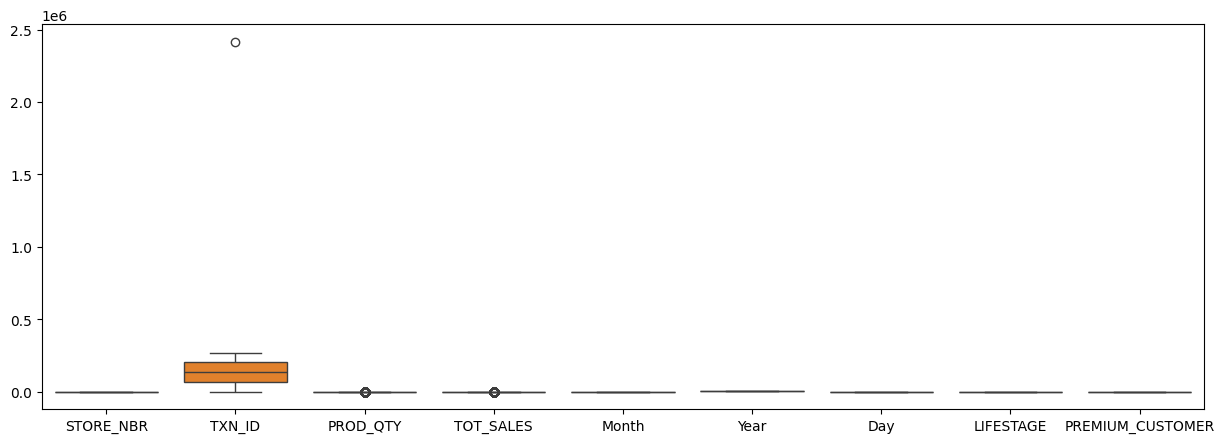

In [36]:
# Finding outliers in the dataset
plt.figure(figsize=(15,5))
sns.boxplot(data=df_final)


In [39]:
df_final["PROD_NAME"].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

In [41]:
# Seperating Prod Size from Prod Name and Brand Name from Prod Name 
df_final['PROD_SIZE'] = df_final['PROD_NAME'].str.extract("(\d+)")


<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\SaadS\AppData\Local\Temp\ipykernel_9796\3835554399.py:2: SyntaxWarning: invalid escape sequence '\d'
  df_final['PROD_SIZE'] = df_final['PROD_NAME'].str.extract("(\d+)")


In [43]:
df_final['BRAND_NAME'] = df_final['PROD_NAME'].str.extract("([a-zA-Z]+)")   

In [44]:
df_final.head()

,STORE_NBR,TXN_ID,PROD_NAME,PROD_QTY,TOT_SALES,Month,Year,Day,LIFESTAGE,PREMIUM_CUSTOMER,PROD_SIZE,BRAND_NAME
0,1,1,Natural Chip Compny SeaSalt175g,2,6.0,10,2018,17,0,2,175,Natural
1,1,348,CCs Nacho Cheese 175g,3,6.3,5,2019,14,3,0,175,CCs
2,1,383,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,5,2019,20,3,0,170,Smiths
3,2,974,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,8,2018,17,3,0,175,Smiths
4,2,1038,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,8,2018,18,3,0,150,Kettle


In [55]:
df_final['PROD_NAME'] = df_final['PROD_NAME'].str.replace(r'\s*\d+[gG]$', '', regex=True)


In [56]:
df_final.head()


,STORE_NBR,TXN_ID,PROD_NAME,PROD_QTY,TOT_SALES,Month,Year,Day,LIFESTAGE,PREMIUM_CUSTOMER,PROD_SIZE,BRAND_NAME
0,1,1,Natural Chip Compny SeaSalt,2,6.0,10,2018,17,0,2,175,Natural
1,1,348,CCs Nacho Cheese,3,6.3,5,2019,14,3,0,175,CCs
2,1,383,Smiths Crinkle Cut Chips Chicken,2,2.9,5,2019,20,3,0,170,Smiths
3,2,974,Smiths Chip Thinly S/Cream&Onion,5,15.0,8,2018,17,3,0,175,Smiths
4,2,1038,Kettle Tortilla ChpsHny&Jlpno Chili,3,13.8,8,2018,18,3,0,150,Kettle


In [59]:
# Removing brand names column values from product names
for index, row in df_final.iterrows():
    brand_name = row['BRAND_NAME']
    df_final.at[index, 'PROD_NAME'] = row['PROD_NAME'].replace(brand_name, '').strip()



In [60]:
df_final.head()

,STORE_NBR,TXN_ID,PROD_NAME,PROD_QTY,TOT_SALES,Month,Year,Day,LIFESTAGE,PREMIUM_CUSTOMER,PROD_SIZE,BRAND_NAME
0,1,1,Chip Compny SeaSalt,2,6.0,10,2018,17,0,2,175,Natural
1,1,348,Nacho Cheese,3,6.3,5,2019,14,3,0,175,CCs
2,1,383,Crinkle Cut Chips Chicken,2,2.9,5,2019,20,3,0,170,Smiths
3,2,974,Chip Thinly S/Cream&Onion,5,15.0,8,2018,17,3,0,175,Smiths
4,2,1038,Tortilla ChpsHny&Jlpno Chili,3,13.8,8,2018,18,3,0,150,Kettle


In [62]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   STORE_NBR         264836 non-null  int64  
 1   TXN_ID            264836 non-null  int64  
 2   PROD_NAME         264836 non-null  object 
 3   PROD_QTY          264836 non-null  int64  
 4   TOT_SALES         264836 non-null  float64
 5   Month             264836 non-null  int32  
 6   Year              264836 non-null  int32  
 7   Day               264836 non-null  int32  
 8   LIFESTAGE         264836 non-null  int64  
 9   PREMIUM_CUSTOMER  264836 non-null  int64  
 10  PROD_SIZE         264836 non-null  object 
 11  BRAND_NAME        264836 non-null  object 
dtypes: float64(1), int32(3), int64(5), object(3)
memory usage: 21.2+ MB


In [63]:
df_final["PROD_SIZE"]=df_final["PROD_SIZE"].astype(int)

In [64]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   STORE_NBR         264836 non-null  int64  
 1   TXN_ID            264836 non-null  int64  
 2   PROD_NAME         264836 non-null  object 
 3   PROD_QTY          264836 non-null  int64  
 4   TOT_SALES         264836 non-null  float64
 5   Month             264836 non-null  int32  
 6   Year              264836 non-null  int32  
 7   Day               264836 non-null  int32  
 8   LIFESTAGE         264836 non-null  int64  
 9   PREMIUM_CUSTOMER  264836 non-null  int64  
 10  PROD_SIZE         264836 non-null  int32  
 11  BRAND_NAME        264836 non-null  object 
dtypes: float64(1), int32(4), int64(5), object(2)
memory usage: 20.2+ MB


### Data Analysis and Visualizations

In [66]:
# Total Sales
totalsales=df_final['TOT_SALES'].sum()
print("Total Sales: ",totalsales)

Total Sales:  1934415.0000000002


In [69]:
# Sales by Customer Segment
sales_by_segment = df_final.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].sum()
print("\nSales by Customer Segment: ",sales_by_segment)


Sales by Customer Segment:  PREMIUM_CUSTOMER
0    676211.55
1    750744.50
2    507458.95
Name: TOT_SALES, dtype: float64


0:Budget
1:MainStream
2:Premium

In [76]:
# Sales by Pack Size
sales_by_pack_size = df_final.groupby('PROD_SIZE')['TOT_SALES'].sum()
print("\nSales by Pack Size: ",sales_by_pack_size)



Sales by Pack Size:  PROD_SIZE
70       6852.0
90       9676.4
110    162765.4
125      5733.0
134    177655.5
135     26090.4
150    304288.5
160     10647.6
165    101360.6
170    146673.0
175    485437.4
180      8568.4
190     14412.9
200     16007.5
210     43048.8
220      6831.0
250     26096.7
270     55425.4
300    113330.6
330    136794.3
380     76719.6
Name: TOT_SALES, dtype: float64


175g has Maximum Sales and 125g has Minimum Sales

In [81]:
# Sales by Brand
sales_by_brand = df_final.groupby('BRAND_NAME')['TOT_SALES'].sum()  
print("\nSales by Brand: ",sales_by_brand)


Sales by Brand:  BRAND_NAME
Burger          6831.0
CCs            18078.9
Cheetos        16884.5
Cheezels       40029.9
Cobs           70569.8
Dorito         40352.0
Doritos       201538.9
French          7929.0
Grain          43048.8
GrnWves         8568.4
Infuzions      76247.6
Infzns         22800.0
Kettle        390239.8
NCC             8046.0
Natural        34272.0
Old            90785.1
Pringles      177655.5
RRD            64954.5
Red            30091.5
Smith          14583.4
Smiths        210076.8
Snbts           5076.2
Sunbites        4600.2
Thins          88852.5
Tostitos       79789.6
Twisties       81522.1
Tyrrells       51647.4
WW             35889.5
Woolworths     13454.1
Name: TOT_SALES, dtype: float64


Maximum Sales of 390239.8 is by Kettle and Minimum Sales of 4600.2 is by Sunbites 

In [87]:
# Average Transaction Value
average_transaction_value = df_final.groupby('TXN_ID')['TOT_SALES'].sum().mean()

print("\nAverage Transaction Value: ",average_transaction_value)


Average Transaction Value:  7.351640082545691


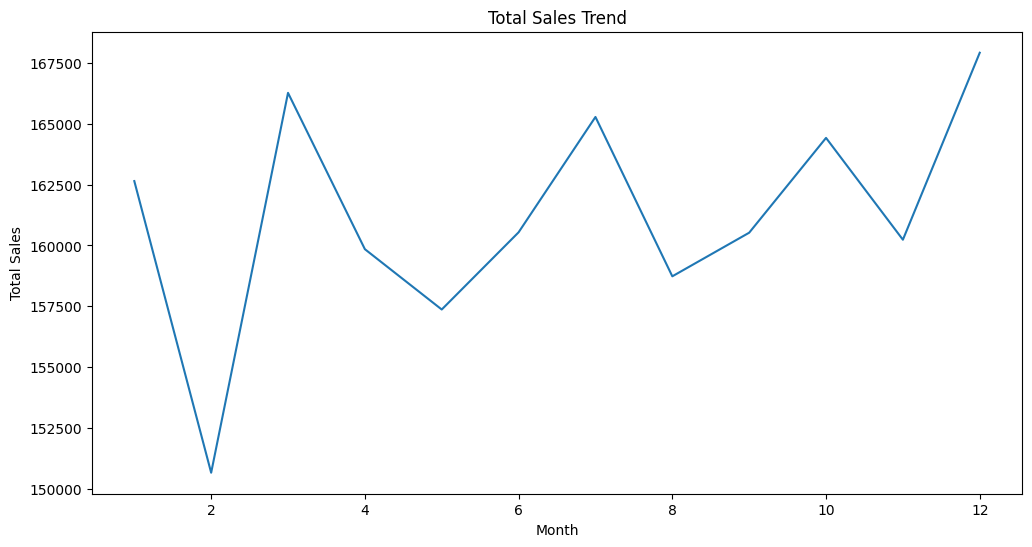

In [93]:
# Total Sales Trend
plt.figure(figsize=(12, 6))
df_final.groupby('Month')['TOT_SALES'].sum().plot()
plt.title('Total Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()


Highest Sales are in December

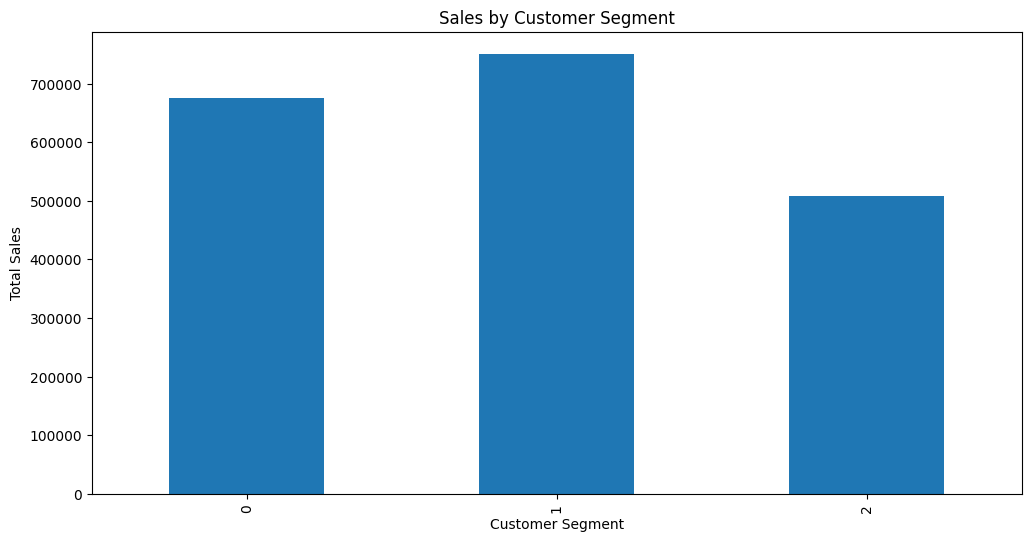

In [94]:
# Sales by Customer Segment
plt.figure(figsize=(12, 6))
df_final.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].sum().plot(kind='bar')
plt.title('Sales by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Sales')
plt.show()


Most Sales are by MainStream Customers

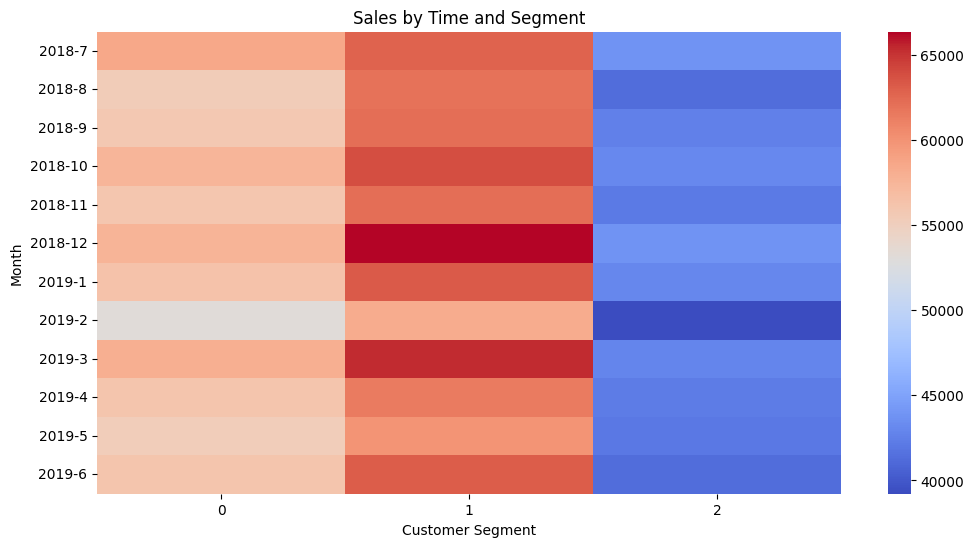

In [95]:
# Heatmap of Sales by Time and Segment
plt.figure(figsize=(12, 6))
df_heatmap = df_final.groupby(['Year', 'Month', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().unstack()
sns.heatmap(df_heatmap, cmap='coolwarm')
plt.title('Sales by Time and Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Month')
plt.show()

Most sales were by MainStream Customers in 2018 December of 65000

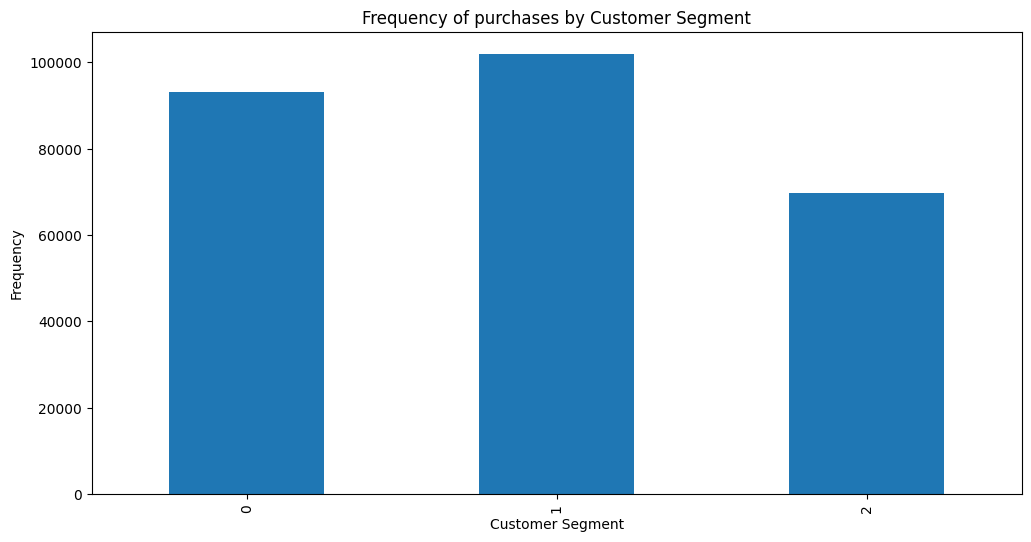

In [96]:
# Frequency of purchases by Customer Segment
plt.figure(figsize=(12, 6))
df_final.groupby('PREMIUM_CUSTOMER')['TXN_ID'].count().plot(kind='bar')
plt.title('Frequency of purchases by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Frequency')
plt.show()

MainStream Customers are making more purchases

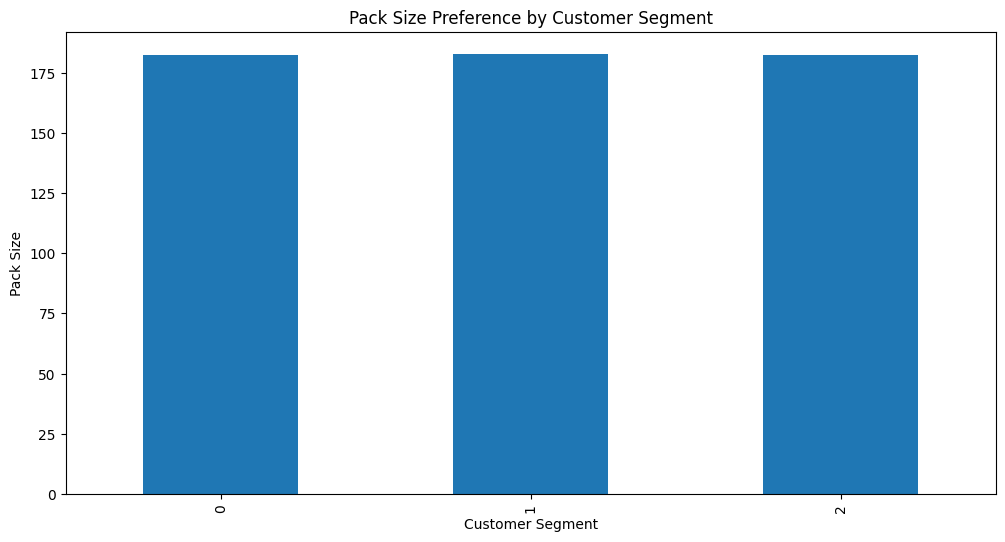

In [97]:
# Pack Size Preference by Customer Segment
plt.figure(figsize=(12, 6))
df_final.groupby('PREMIUM_CUSTOMER')['PROD_SIZE'].mean().plot(kind='bar')
plt.title('Pack Size Preference by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Pack Size')
plt.show()


Almost all Customer Segments Prefer 175g Product Size

<Figure size 2000x1200 with 0 Axes>

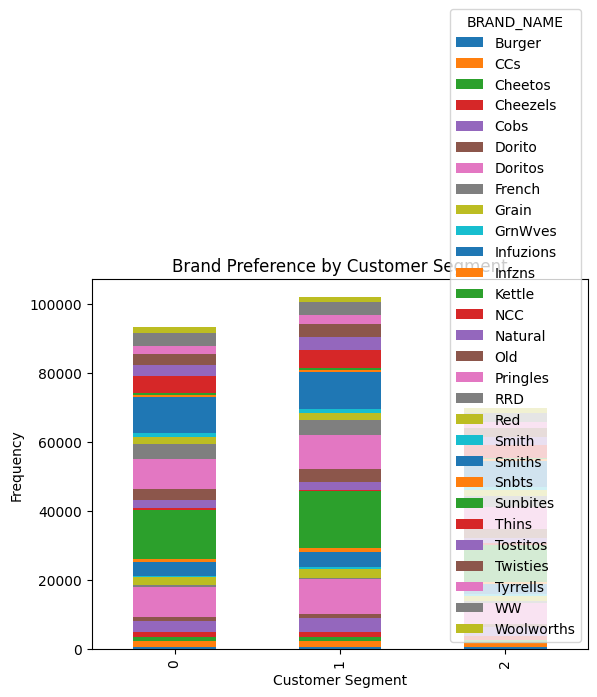

In [104]:
# Brand Preference by Customer Segment
# increase plt size
plt.figure(figsize=(20, 12))
df_final.groupby('PREMIUM_CUSTOMER')['BRAND_NAME'].value_counts().unstack().plot(kind='bar', stacked=True)
plt.title('Brand Preference by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Frequency')
plt.show()


### Recommendations

1. MainStream Customer Segments generate the most revenue or have the highest CLV.
2. MainStream Customer Segments have increasing spending or high average transaction values.
3. Allmost All Customer Segments Prefer 175g Pack Sizes
4. Budget and MainStream Customer Segments Prefer Kettle and Premium Customer Segment Prefers Pringles
5. Most sales are in the Month of December
